### CSE 5243 Introduction to Data Mining (SP18)
# Lab 5: Classification

Allen Lin <lin.2237@osu.edu>

Yuxiao Zhao <zhao.2379@osu.edu>  by April 23 2018

## 0. Get the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# dataset 2
wineq =  pd.read_csv("wineq.csv",sep=',')

In [3]:
wineq.shape

(1000, 13)

In [4]:
wineq.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,6.3,0.290,0.30,8.1,0.212,60.0,150.0,0.99580,3.10,0.40,9.3,5,white
1,6.8,0.440,0.20,16.0,0.065,61.0,186.0,0.99884,3.13,0.45,8.6,5,white
2,6.1,0.270,0.31,3.9,0.034,42.0,137.0,0.99218,3.24,0.46,10.9,6,white
3,9.4,0.260,0.53,1.2,0.047,25.0,109.0,0.99210,3.23,0.28,12.5,6,white
4,7.6,0.445,0.44,14.5,0.045,68.0,212.0,0.99860,3.48,0.36,10.0,6,white


In [5]:
wineq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
fixed acidity           1000 non-null float64
volatile acidity        1000 non-null float64
citric acid             1000 non-null float64
residual sugar          1000 non-null float64
chlorides               1000 non-null float64
free sulfur dioxide     1000 non-null float64
total sulfur dioxide    1000 non-null float64
density                 1000 non-null float64
pH                      1000 non-null float64
sulphates               1000 non-null float64
alcohol                 1000 non-null float64
quality                 1000 non-null int64
type                    1000 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 101.6+ KB


## 2. Compare Clustering Algorithms

#### explorartory analysis

In [6]:
wineq.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,red
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500
mean,7.535850,0.407425,0.299380,4.486750,0.067303,26.262500,94.32000,0.995409,3.255770,0.576520,10.455833,5.740000,NaN
std,1.483296,0.189225,0.164784,4.106766,0.044576,17.106007,60.84508,0.002804,0.163661,0.161609,1.142934,0.842086,NaN
min,4.600000,0.100000,0.000000,0.800000,0.012000,2.000000,7.00000,0.987580,2.770000,0.270000,8.500000,3.000000,NaN
25%,6.600000,0.267500,0.200000,1.900000,0.043000,13.000000,40.00000,0.993528,3.137500,0.470000,9.500000,5.000000,NaN
50%,7.200000,0.360000,0.300000,2.400000,0.059000,23.000000,91.00000,0.995720,3.250000,0.550000,10.200000,6.000000,NaN
75%,8.100000,0.540000,0.400000,5.800000,0.080000,36.000000,140.00000,0.997400,3.360000,0.650000,11.200000,6.000000,NaN


We need to scale the attribute.

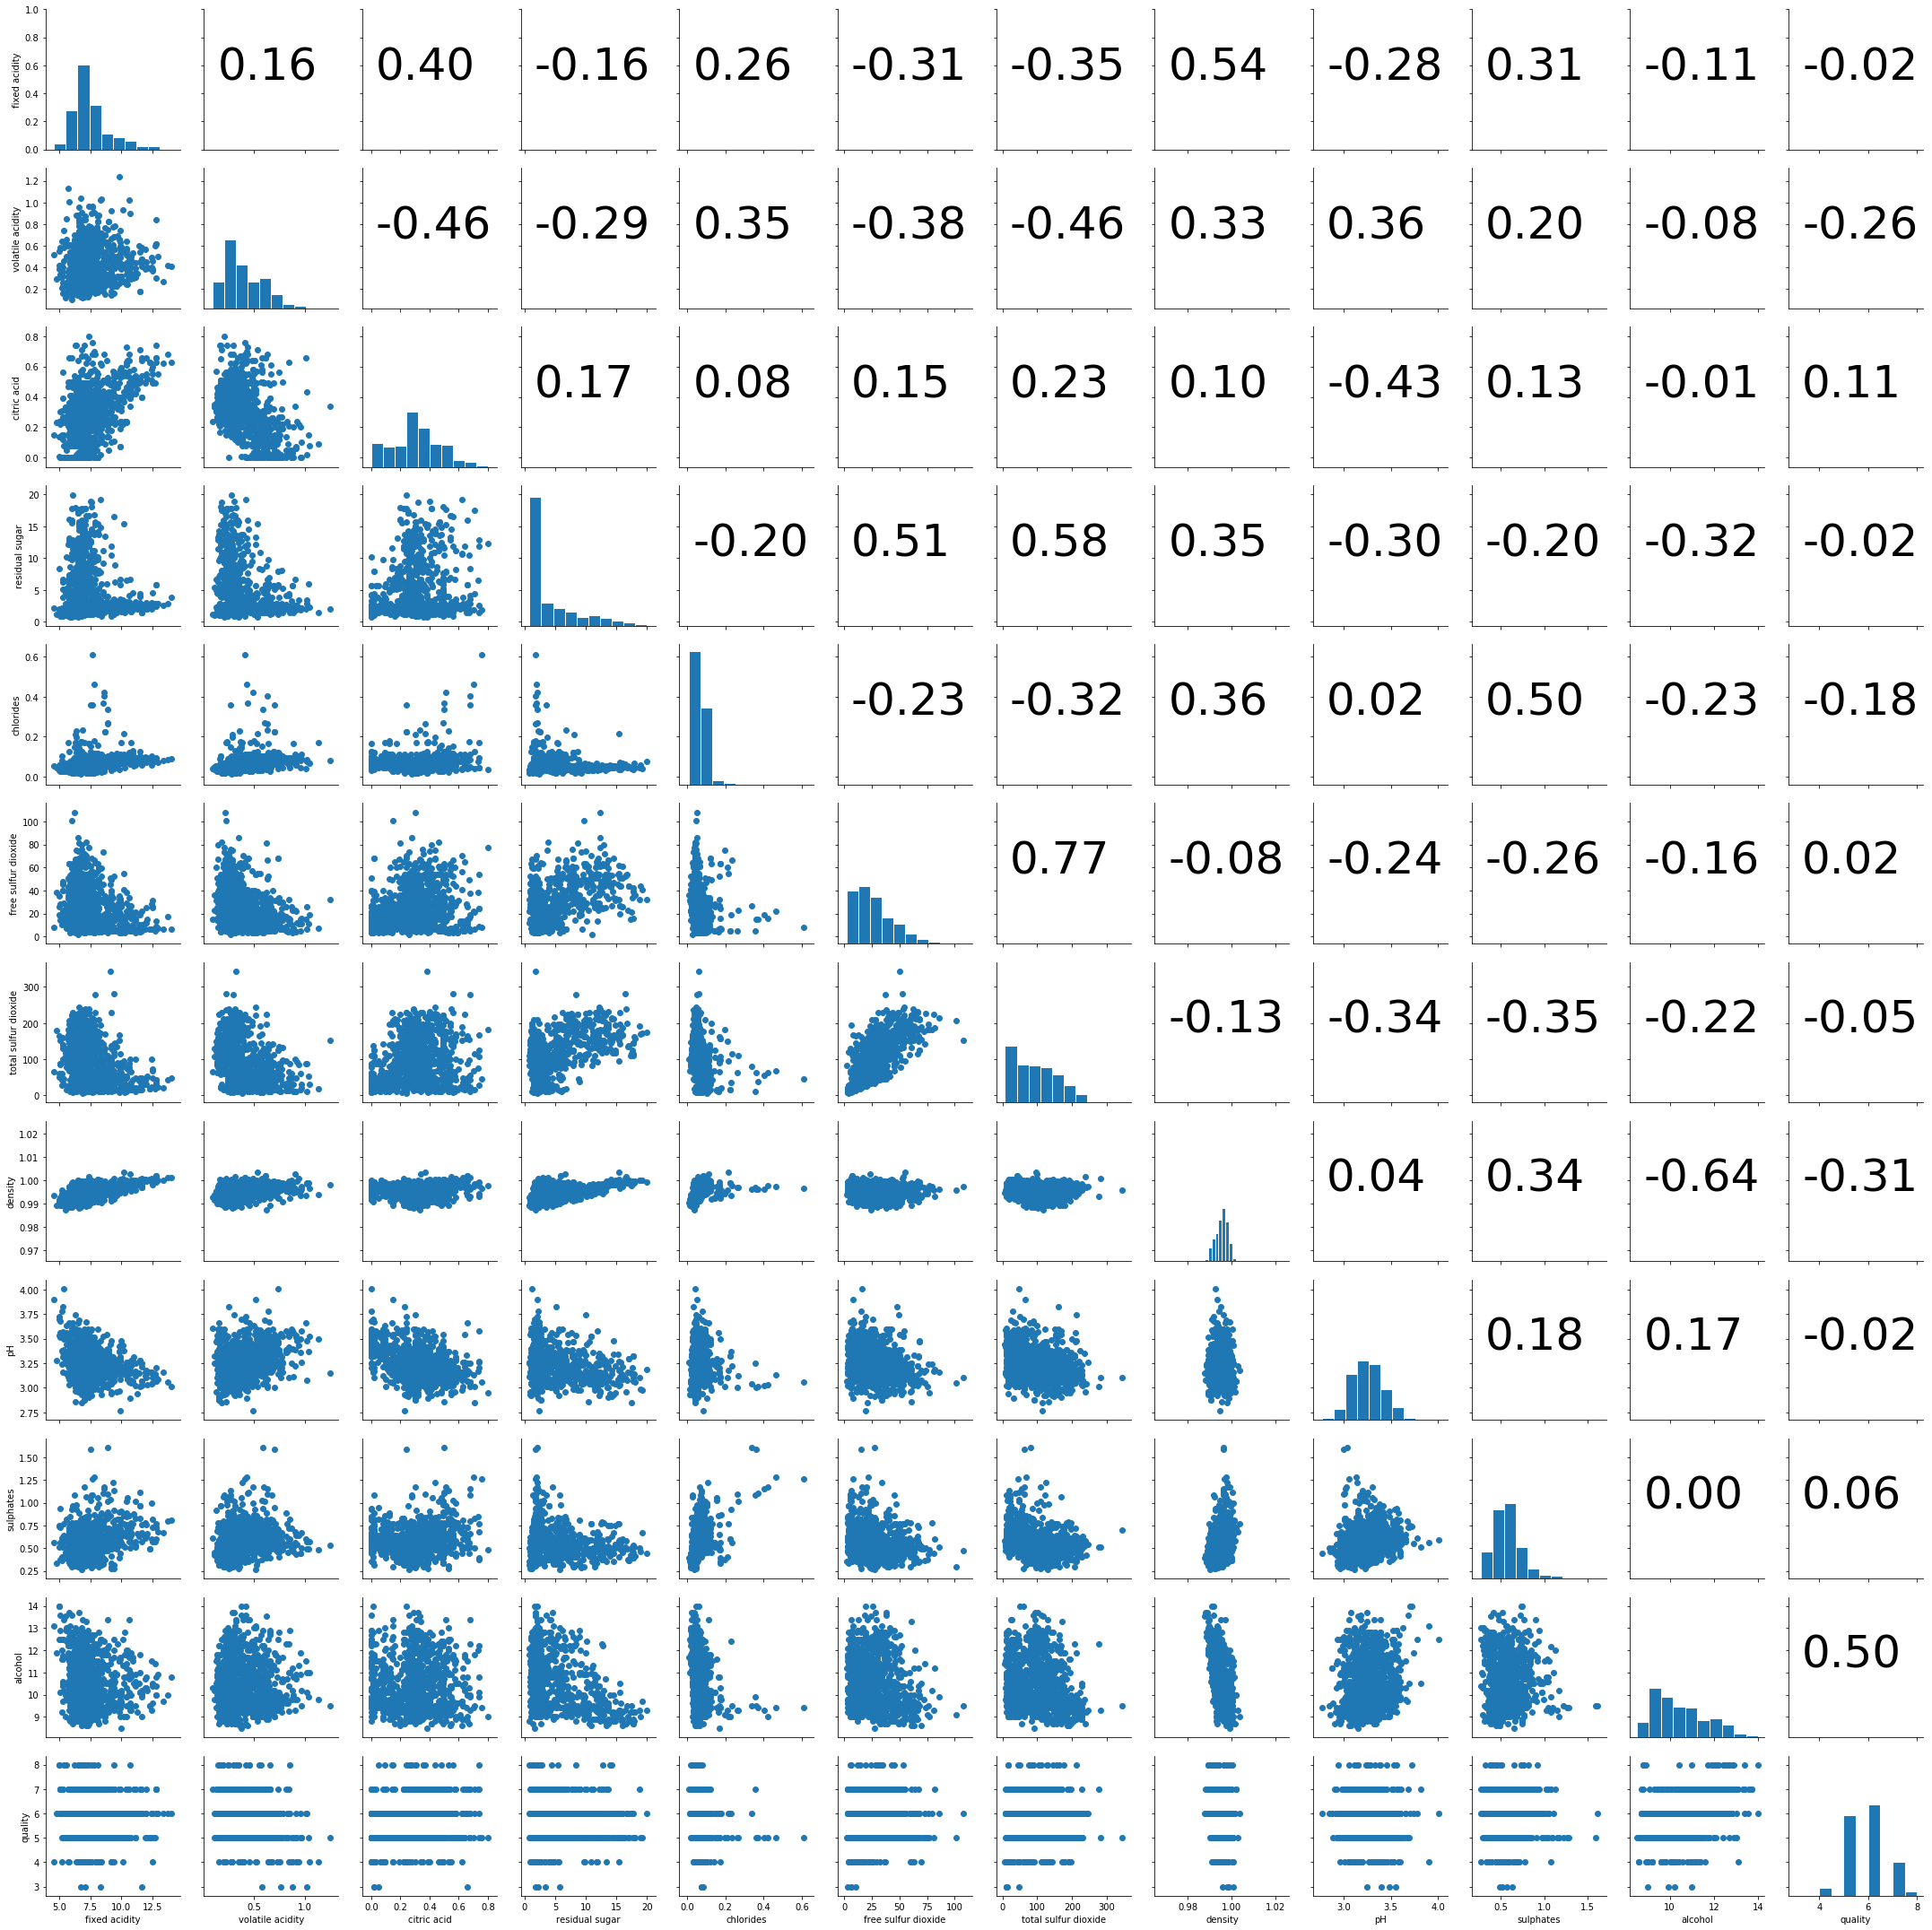

In [7]:
# correlation matrix
import scipy as sp
import seaborn as sns
def corrfunc(x, y, **kws):
    r, _ = sp.stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("{:.2f}".format(r), xy=(.1, .5), xycoords=ax.transAxes, size=50)

g = sns.PairGrid(wineq)
g = g.map_lower(plt.scatter)
g = g.map_diag(plt.hist, edgecolor="w")
g = g.map_upper(corrfunc)

Alcohol predicts the quality best.

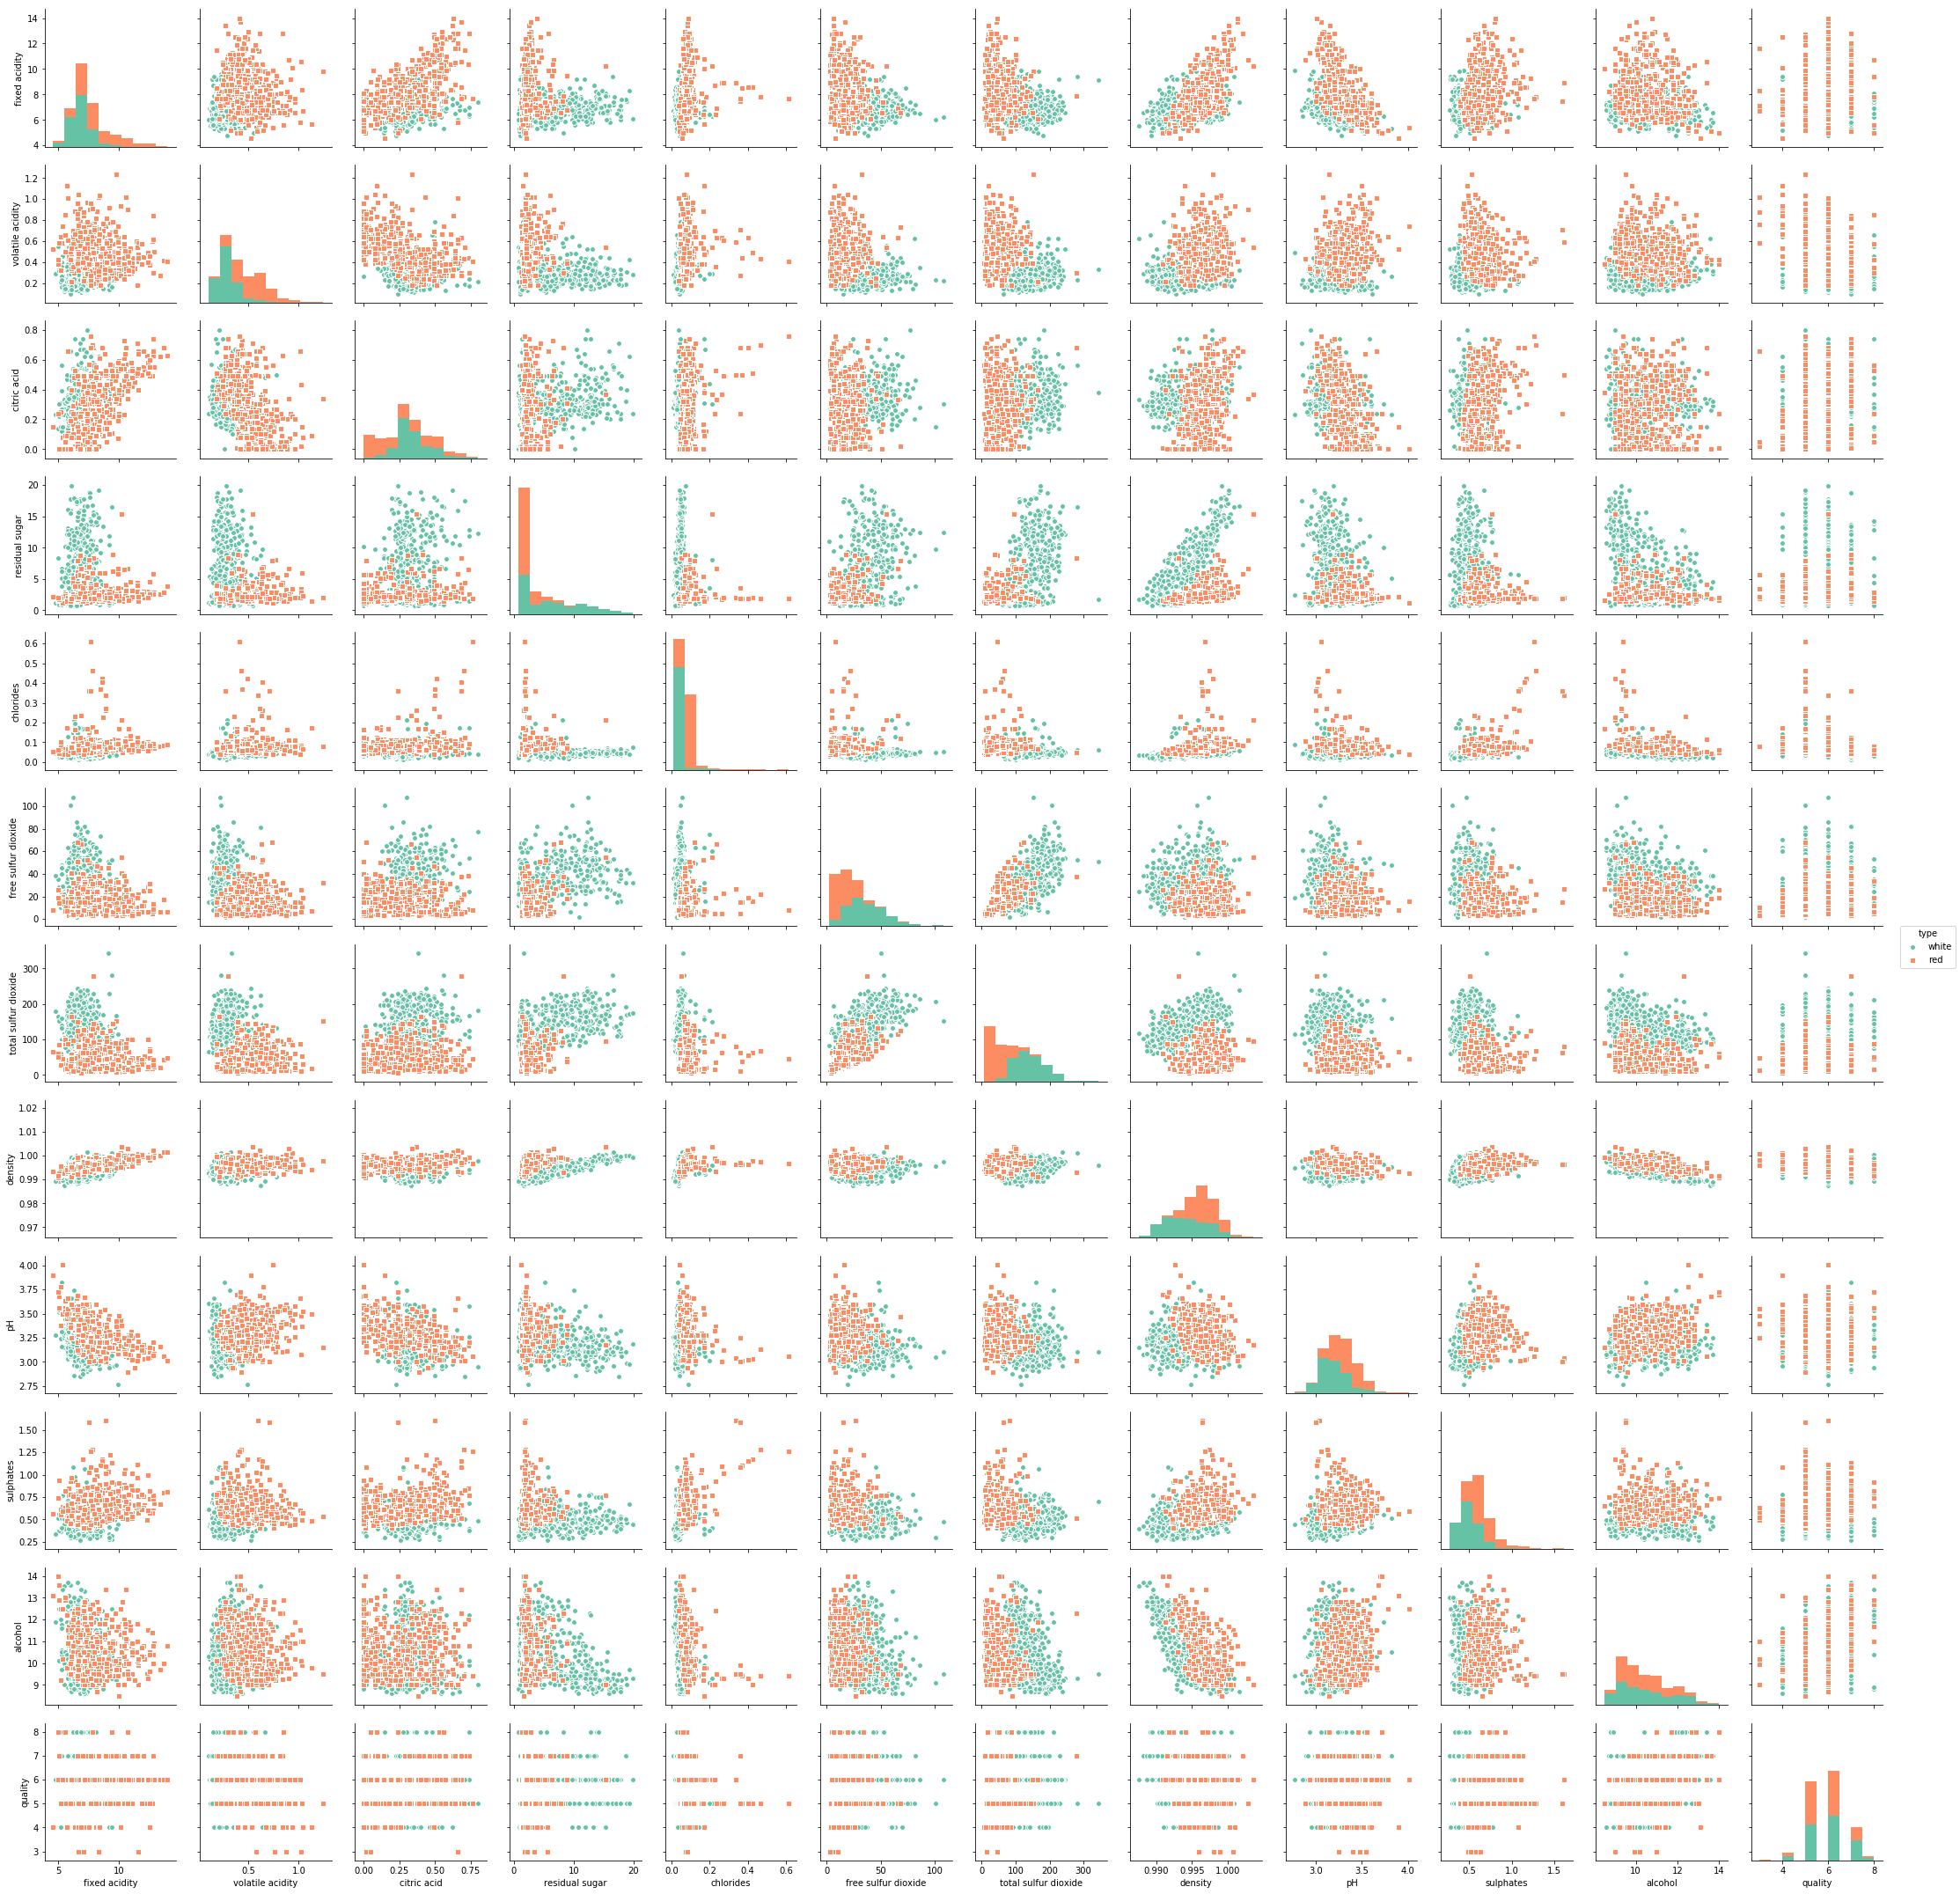

In [8]:
# scatter plot
sns.pairplot(wineq, kind="scatter", hue="type", markers=["o", "s"], palette="Set2")

### feature selection and scaling

First, we selected attributes that are correlated with quality and those that differentiate the type better.
Second, because the attributes have different scales, we had better scale them

In [9]:
from sklearn.preprocessing import scale
data_quality = scale(wineq.loc[:,['alcohol','density','volatile acidity']])
data_type = scale(wineq.iloc[:,5:9])

Convert the quality and type attributes to arrays.

In [10]:
y_quality = np.array(wineq['quality'])
y_type = np.array(wineq['type'])

PCA transform attributes to 2 dimensions.

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_quality = pca.fit_transform(data_quality)
pca_type = pca.fit_transform(data_type)

### Kmeans

In [12]:
from sklearn.cluster import KMeans

n_clusters is the number of clusters and centroids to generate. *default is 8*

init : the initial centroid to start with. There are three options: 'k-means++', 'random' or an ndarray. 
'k-means++' selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
'random': choose k observations (rows) at random from data for the initial centroids.
*default is 'k-means++'.*

#### predict the quality

In [13]:
kmeans_quality = KMeans(init='k-means++', n_clusters=6, n_init=10)
kmeans_quality = kmeans_quality.fit(pca_quality)
kmeans_qpred = kmeans_quality.predict(pca_quality)

In [14]:
# plotting for the confusion matrix used in each classifications below
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)
    


 Predicted cluster    0    1    2    3    4   5   All
Actual quality                                      
3                    0    1    0    0    0   3     4
4                    7    5    2    8    5   9    36
5                  114  131   13   65   15  30   368
6                   85   79   64  108   63  19   418
7                   13   13   66   43   19   2   156
8                    3    0    9    3    3   0    18
All                222  229  154  227  105  63  1000 



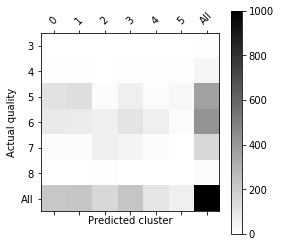

In [15]:
y_actu = pd.Series(y_quality, name='Actual quality')
y_pred = pd.Series(kmeans_qpred, name='Predicted quality')
df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual quality'], colnames=['Predicted cluster'], margins=True)
plot_confusion_matrix(df_confusion)
print('\n',df_confusion,'\n')

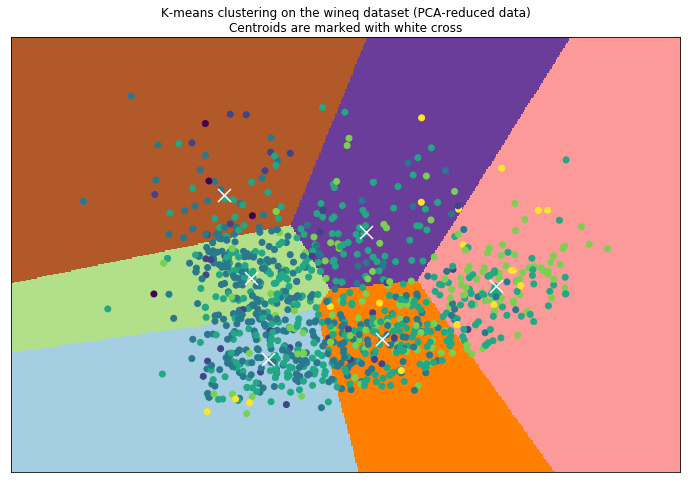

In [16]:
# visualize the result
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = pca_quality[:, 0].min() - 1, pca_quality[:, 0].max() + 1
y_min, y_max = pca_quality[:, 1].min() - 1, pca_quality[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans_quality.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1,figsize=(12,8))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.scatter(pca_quality[:, 0], pca_quality[:, 1], c=y_quality)
# Plot the centroids as a white X
centroids = kmeans_quality.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the wineq dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

#### predict the type

In [17]:
kmeans_type = KMeans(init='k-means++', n_clusters=2, n_init=10)
kmeans_type = kmeans_type.fit(pca_type)
kmeans_tpred = kmeans_type.predict(pca_type)


 Predicted cluster    0    1   All
Actual type                      
red                 33  467   500
white              453   47   500
All                486  514  1000 



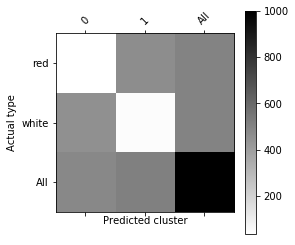

In [18]:
y_actu = pd.Series(y_type, name='Actual quality')
y_pred = pd.Series(kmeans_tpred, name='Predicted quality')
df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual type'], colnames=['Predicted cluster'], margins=True)
plot_confusion_matrix(df_confusion)
print('\n',df_confusion,'\n')

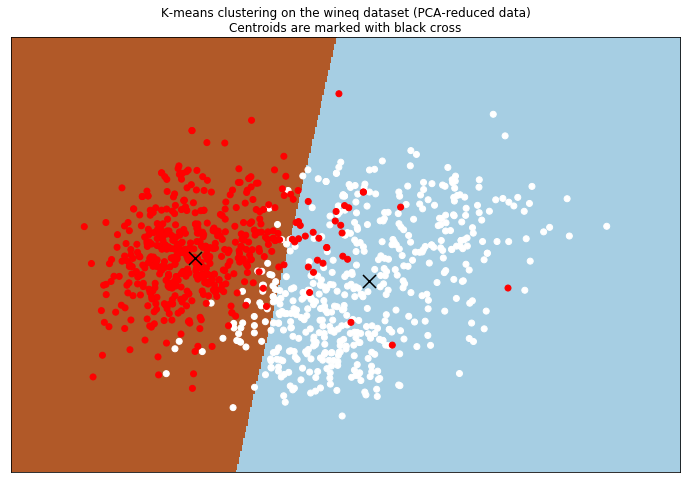

In [19]:
# visualize the result
# Step size of the mesh. Decrease to increase the type of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = pca_type[:, 0].min() - 1, pca_type[:, 0].max() + 1
y_min, y_max = pca_type[:, 1].min() - 1, pca_type[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans_type.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1,figsize=(12,8))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.scatter(pca_type[:, 0], pca_type[:, 1], c=y_type)
# Plot the centroids as a white X
centroids = kmeans_type.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='black', zorder=10)
plt.title('K-means clustering on the wineq dataset (PCA-reduced data)\n'
          'Centroids are marked with black cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

kmeans differentiates type better than quality. Basically we could identify the two clusters for two types while we cannot identify those for quality class. The major reason is that the difference between different quality categories is not large enough and the attributes we use here are not strong enough to differentiate the quality. They are not major determiants of the quality. Also kmeans does not work well when we have clusters of different sizes.

### Agglomerative Clustering

In [20]:
from sklearn.cluster import AgglomerativeClustering

n_clusters : The number of clusters to find. *default is 2*

affinity : Metric used to compute the linkage. Can be "euclidean", "l1", "l2", "manhattan", "cosine", or 'precomputed'.
    *default is "euclidean"*
    
linkage : {"ward", "complete", "average"}, Which linkage criterion to use. The linkage criterion determines which
    distance to use between sets of observation. The algorithm will merge
    the pairs of cluster that minimize this criterion. *default: "ward"*

#### predict the quality

In [21]:
aglm_quality = AgglomerativeClustering(n_clusters=6, affinity = 'cosine',linkage = 'average')
aglm_qpred = aglm_quality.fit_predict(pca_quality)


 Predicted cluster    0    1    2    3    4   5   All
Actual quality                                      
3                    0    0    3    0    1   0     4
4                    3    5   14    5    5   4    36
5                   12   74  127   26  102  27   368
6                   64   72   82  100   54  46   418
7                   21   14   12   85   10  14   156
8                    7    4    0    6    0   1    18
All                107  169  238  222  172  92  1000 



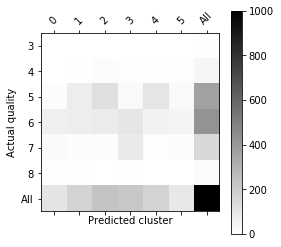

In [22]:
y_actu = pd.Series(y_quality, name='Actual quality')
y_pred = pd.Series(aglm_qpred, name='Predicted quality')
df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual quality'], colnames=['Predicted cluster'], margins=True)
plot_confusion_matrix(df_confusion)
print('\n',df_confusion,'\n')

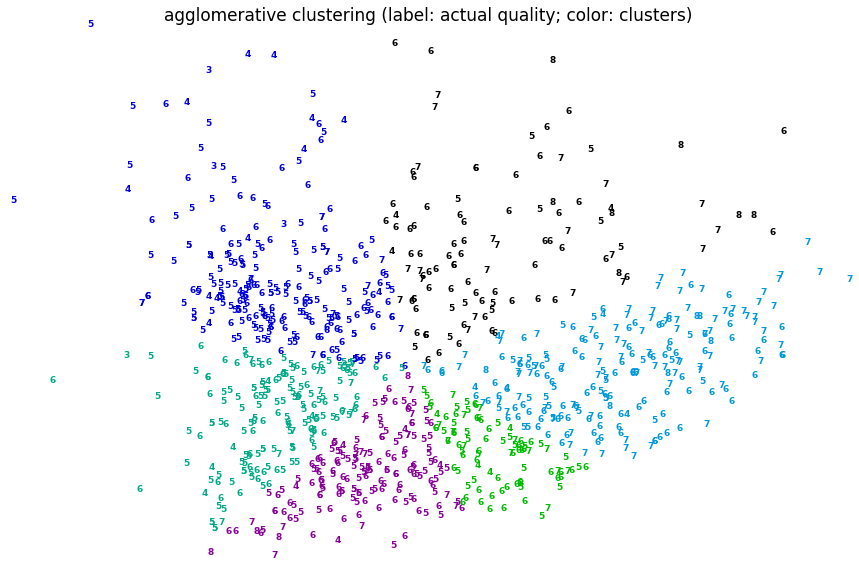

In [23]:
x_min, x_max = np.min(pca_quality, axis=0), np.max(pca_quality, axis=0)
X_red = (pca_quality - x_min) / (x_max - x_min)
plt.figure(figsize=(12, 8))
for i in range(X_red.shape[0]):
    plt.text(X_red[i, 0], X_red[i, 1], str(y_quality[i]),
    color=plt.cm.spectral(aglm_qpred[i] / 10.),
    fontdict={'weight': 'bold', 'size': 9})

plt.xticks([])
plt.yticks([])
plt.title('agglomerative clustering (label: actual quality; color: clusters)', size=17)
plt.axis('off')
plt.tight_layout()

#### predict the type

In [24]:
aglm_type = AgglomerativeClustering(n_clusters=2, affinity = 'cosine', linkage = 'average')
aglm_tpred = aglm_type.fit_predict(pca_type)


 Predicted cluster    0    1   All
Actual type                      
red                 26  474   500
white              463   37   500
All                489  511  1000 



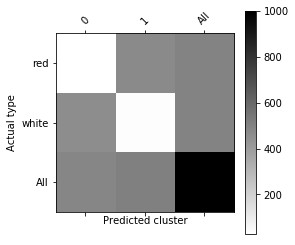

In [25]:
y_actu = pd.Series(y_type, name='Actual type')
y_pred = pd.Series(aglm_tpred, name='Predicted type')
df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual type'], colnames=['Predicted cluster'], margins=True)
plot_confusion_matrix(df_confusion)
print('\n',df_confusion,'\n')

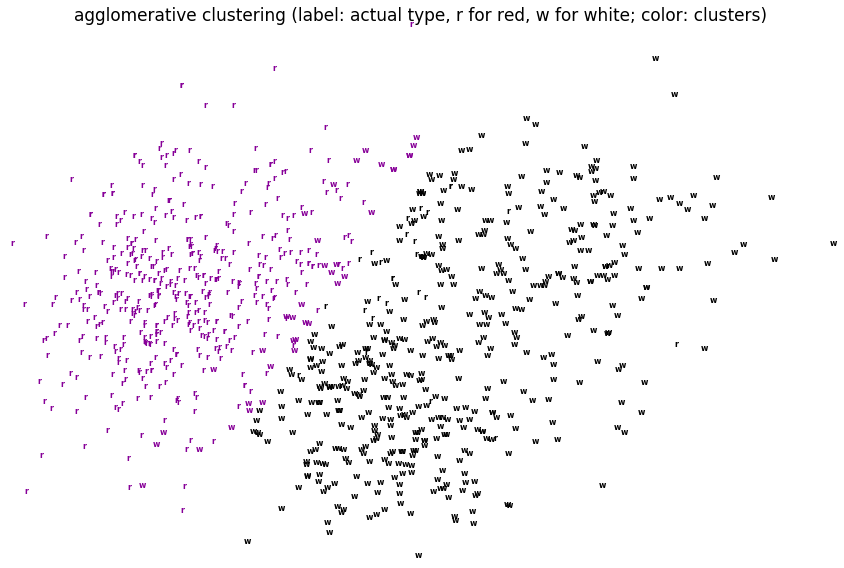

In [26]:
x_min, x_max = np.min(pca_type, axis=0), np.max(pca_type, axis=0)
X_red = (pca_type - x_min) / (x_max - x_min)
plt.figure(figsize=(12, 8))
for i in range(X_red.shape[0]):
    if y_type[i] =='red':
        label = 'r'
    else:
        label = 'w'
    plt.text(X_red[i, 0], X_red[i, 1], str(label),
    color=plt.cm.spectral(aglm_tpred[i] / 10.),
    fontdict={'weight': 'bold', 'size': 8})

plt.xticks([])
plt.yticks([])
plt.title('agglomerative clustering (label: actual type, r for red, w for white; color: clusters)', size=17)
plt.axis('off')
plt.tight_layout()

agglomerative clustering works for the type, but not for the quality. As the data cannot predict quality very well, they cannot differentiate between quality class.

### DBscan

In [27]:
from sklearn.cluster import DBSCAN

eps : The maximum distance between two samples for them to be considered
    as in the same neighborhood. *default = 0.5*

min_samples : The number of samples (or total weight) in a neighborhood for a point
    to be considered as a core point. This includes the point itself. *default = 5*

metric : 
    The metric to use when calculating distance between instances in a
    feature array. 
    From scikit-learn: [‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’]. These metrics support sparse matrix inputs.
    From scipy.spatial.distance: [‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘correlation’, ‘dice’, ‘hamming’, ‘jaccard’, ‘kulsinski’, ‘mahalanobis’, ‘matching’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’, ‘yule’] These metrics do not support sparse matrix inputs.
    *default is ’euclidean’*

#### predict the quality

In [28]:
db_quality = DBSCAN(eps = 0.3, min_samples =4, metric = 'euclidean')
db_qpred = db_quality.fit(pca_quality)


 Predicted clusters  -1    0   1  2   3  4   All
Actual quality                                 
3                    2    2   0  0   0  0     4
4                    4   28   1  0   3  0    36
5                    8  354   2  0   3  1   368
6                   14  389   7  2   4  2   418
7                    9  142   2  2   0  1   156
8                    4   12   2  0   0  0    18
All                 41  927  14  4  10  4  1000 



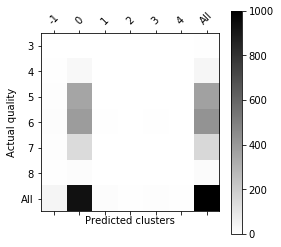

In [29]:
y_actu = pd.Series(y_quality, name='Actual quality')
y_pred = pd.Series(db_qpred.labels_, name='Predicted clusters')
df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual quality'], colnames=['Predicted clusters'], margins=True)
plot_confusion_matrix(df_confusion)
print('\n',df_confusion,'\n')

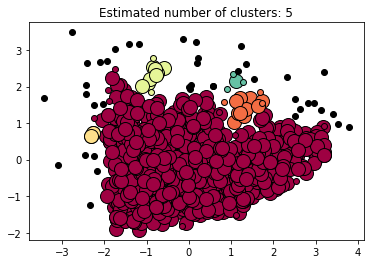

In [30]:
core_samples_mask = np.zeros_like(db_quality.labels_, dtype=bool)
core_samples_mask[db_quality.core_sample_indices_] = True
labels = db_quality.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = pca_quality[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = pca_quality[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

#### predict the type

In [31]:
db_type = DBSCAN(eps = 0.3, min_samples =4, metric = 'euclidean')
db_tpred = db_type.fit(pca_type)


 Predicted clusters  -1    0  1   All
Actual type                         
red                 11  485  4   500
white               17  483  0   500
All                 28  968  4  1000 



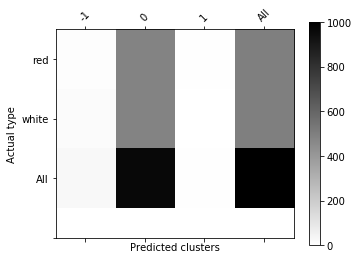

In [32]:
y_actu = pd.Series(y_type, name='Actual type')
y_pred = pd.Series(db_tpred.labels_, name='Predicted clusters')
df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual type'], colnames=['Predicted clusters'], margins=True)
plot_confusion_matrix(df_confusion)
print('\n',df_confusion,'\n')

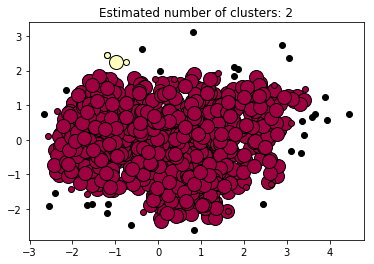

In [33]:
core_samples_mask = np.zeros_like(db_type.labels_, dtype=bool)
core_samples_mask[db_type.core_sample_indices_] = True
labels = db_type.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = pca_type[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = pca_type[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

DBSCAN does not work for both quality and type attribute. It will group most of the points into one class. This is because these points share similar density, which make the algorithm group them together. For example, for the type, two actual cluster may not have very clear boundaries which make DBSCAN hard to group points.

Overall, for type, agglomerative clustering is the best clustering algorithm, kmeans is the second best, and dbscan is the worst. This is because agglomerate clustering using average linkage is more robust to the outliers or noise. DBSCAN is the worst as we not have clusters with clear boundaries.

## 3. Exceptional Work

### 1. Choose one of the other clustering algoritms -- mean shift

In [34]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs

bandwidth :
    Bandwidth used in the RBF kernel.

seeds : 
    Seeds used to initialize kernels. 

#### predict the quality

In [35]:
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(pca_quality, quantile=0.13, n_samples=50)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(pca_quality)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 6



 Predicted clusters    0    1    2    3   4   5   All
Actual quality                                      
3                     0    2    0    0   0   2     4
4                     8    9    9    6   0   4    36
5                   116  154   73   15   0  10   368
6                    89  102  148   66   9   4   418
7                    15   16   68   38  19   0   156
8                     3    0    5    7   3   0    18
All                 231  283  303  132  31  20  1000 



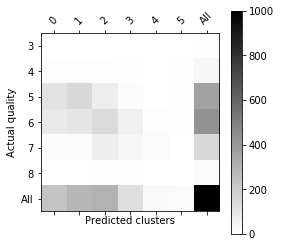

In [36]:
y_actu = pd.Series(y_quality, name='Actual quality')
y_pred = pd.Series(labels, name='Predicted clusters')
df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual quality'], colnames=['Predicted clusters'], margins=True)
plot_confusion_matrix(df_confusion)
print('\n',df_confusion,'\n')

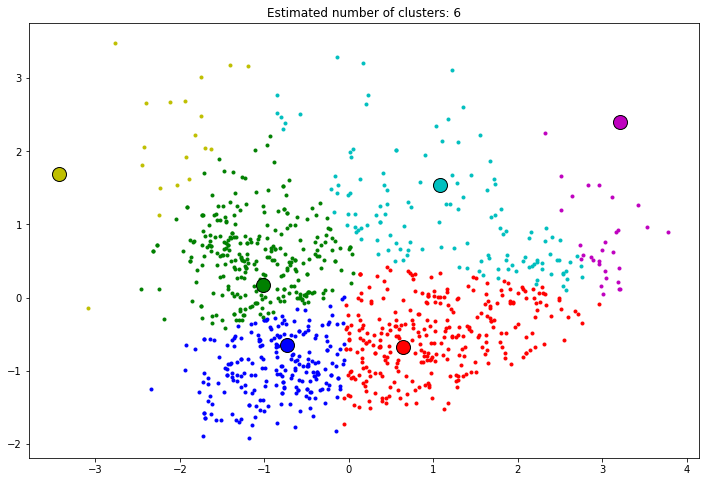

In [37]:
# Plot result
from itertools import cycle

plt.figure(1,figsize=(12,8))
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(pca_quality[my_members, 0], pca_quality[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

#### predict the type

In [38]:
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(pca_type, quantile=0.3, n_samples=40)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(pca_type)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 2



 Predicted clusters    0    1   All
Actual type                       
red                 466   34   500
white                25  475   500
All                 491  509  1000 



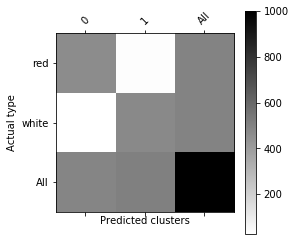

In [39]:
y_actu = pd.Series(y_type, name='Actual type')
y_pred = pd.Series(labels, name='Predicted clusters')
df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual type'], colnames=['Predicted clusters'], margins=True)
plot_confusion_matrix(df_confusion)
print('\n',df_confusion,'\n')

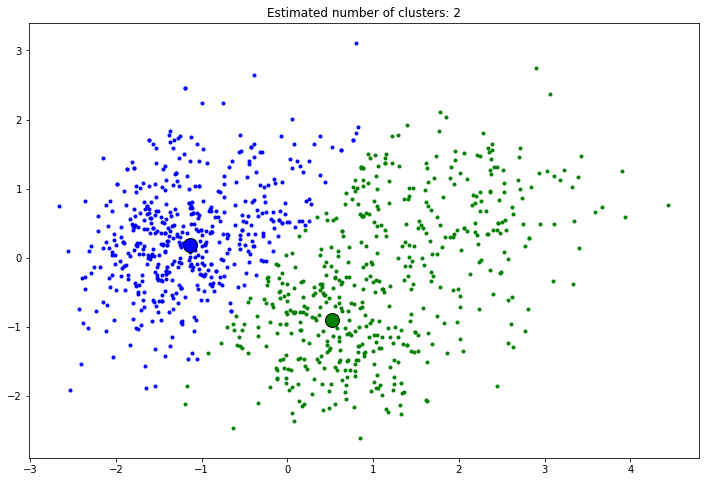

In [40]:
# Plot result
from itertools import cycle

plt.figure(1,figsize=(12,8))
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(pca_type[my_members, 0], pca_type[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

For type clustering, mean shift performs slightly better than kmeans and aggolomerative clustering, because it works for the case with any clusters, uneven cluster size, non-flat geometry. But it does not classify the quality well because of the input attributes.